In [145]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# import the necessary packages

In [146]:
train = pd.read_csv("train.csv")
train.head()

test = pd.read_csv("test.csv")
test.head()

data = pd.concat([train, test]).reset_index(drop=True)
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234500 entries, 0 to 234499
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Name                                   234500 non-null  object 
 2   Gender                                 234500 non-null  object 
 3   Age                                    234500 non-null  float64
 4   City                                   234500 non-null  object 
 5   Working Professional or Student        234500 non-null  object 
 6   Profession                             173238 non-null  object 
 7   Academic Pressure                      46664 non-null   float64
 8   Work Pressure                          187804 non-null  float64
 9   CGPA                                   46664 non-null   float64
 10  Study Satisfaction                     46664 non-null   

In [148]:
def show_missing_values(data, palette="viridis"):
    missing_values = data.isna().sum().sort_values(ascending=False)
    sns.barplot(x=missing_values.values, y=missing_values.index,palette=palette)

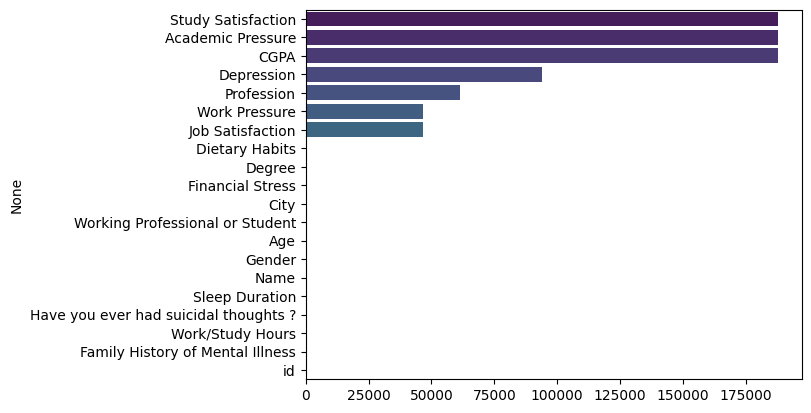

In [149]:
show_missing_values(data)

<Axes: ylabel='Count'>

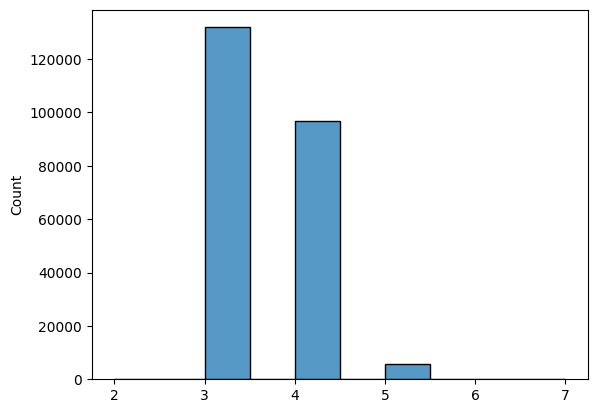

In [150]:
sns.histplot(data.isnull().sum(axis=1), bins=10)

<Axes: >

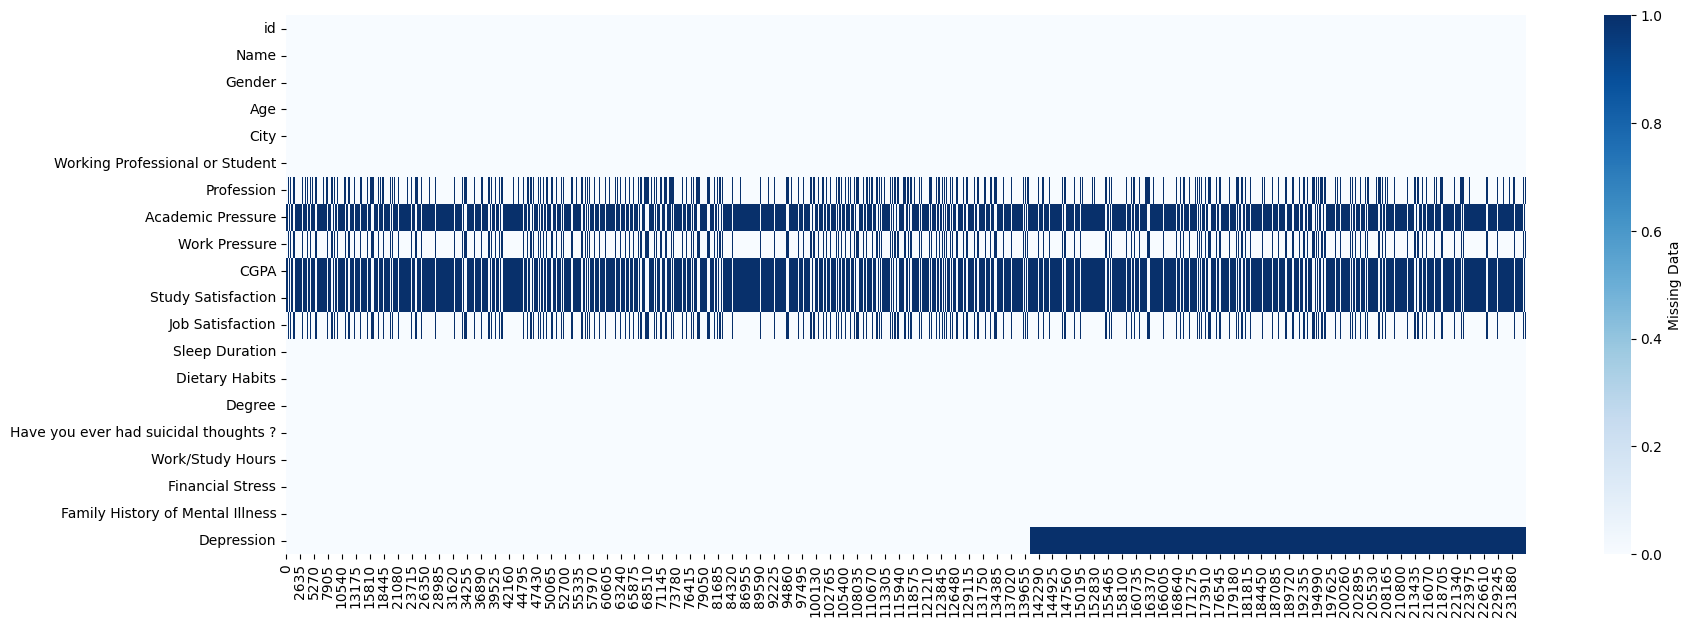

In [151]:
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(data.isna().transpose(),cbar_kws={'label': 'Missing Data'},cmap="Blues",ax=ax)

Most missing values have 2 or more if missing value exists within the row. Likely, the columns are correlated with each other in some way.

<Axes: xlabel='Depression', ylabel='count'>

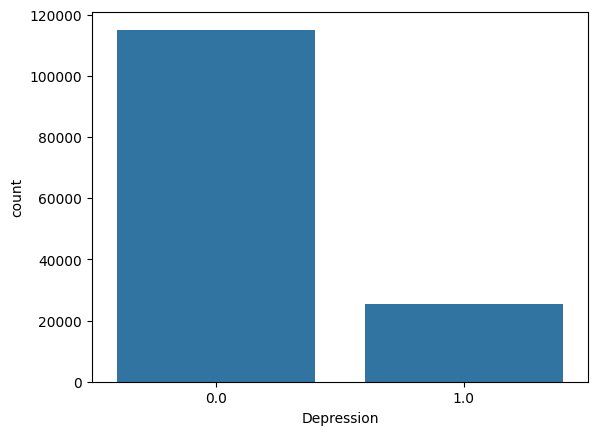

In [152]:
sns.countplot(data, x="Depression")

<Axes: xlabel='Financial Stress', ylabel='count'>

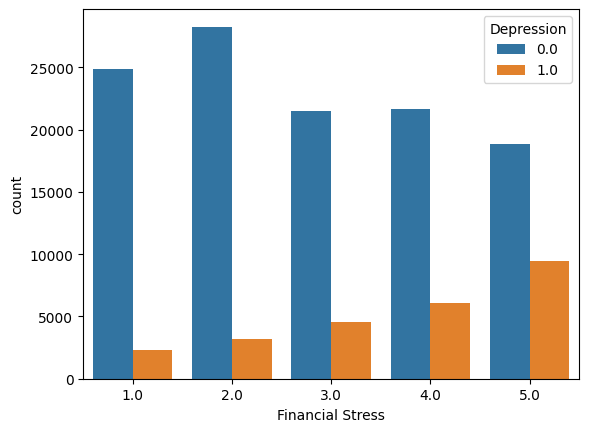

In [153]:
sns.countplot(data,x="Financial Stress",hue="Depression")

In [154]:
data['Financial Stress'] = data['Financial Stress'].transform(lambda x: x.fillna(x.mode()[0]))

In [155]:
data['Degree'] = data.groupby(by=["Working Professional or Student"])['Degree'].transform(lambda x: x.fillna(x.mode()[0]))

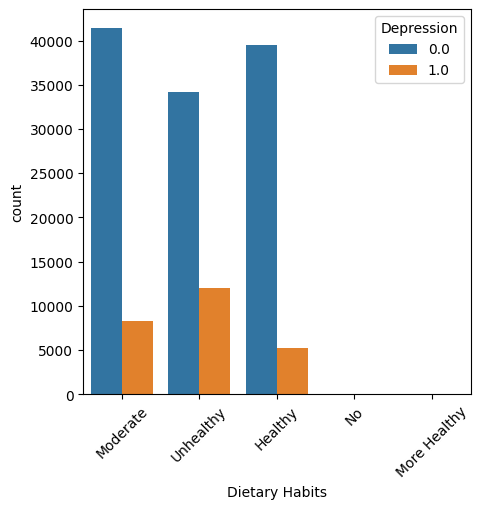

In [156]:
fig, axs = plt.subplots(ncols=1, nrows=1,figsize=(5,5))

sns.countplot(data,x="Dietary Habits",order=data["Dietary Habits"].value_counts().iloc[:5].index,ax=axs,hue="Depression")
axs.tick_params(axis='x', rotation=45)

In [157]:
data['Dietary Habits'] = data['Dietary Habits'].transform(lambda x: x.fillna(x.mode()[0]))

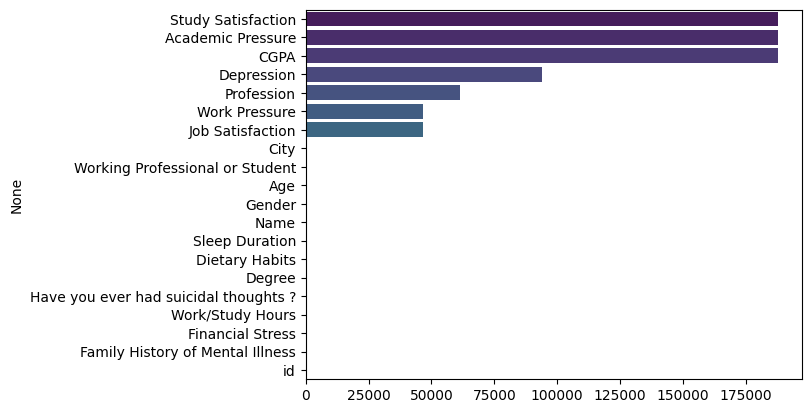

In [158]:
show_missing_values(data)

In [159]:
data["Job Satisfaction"] = data["Job Satisfaction"].transform(lambda x: x.fillna("Unknown"))
data["Work Pressure"] = data["Work Pressure"].transform(lambda x: x.fillna("Unknown"))
data["Profession"] = data["Profession"].transform(lambda x: x.fillna("Unknown"))

<Axes: xlabel='Work Pressure', ylabel='count'>

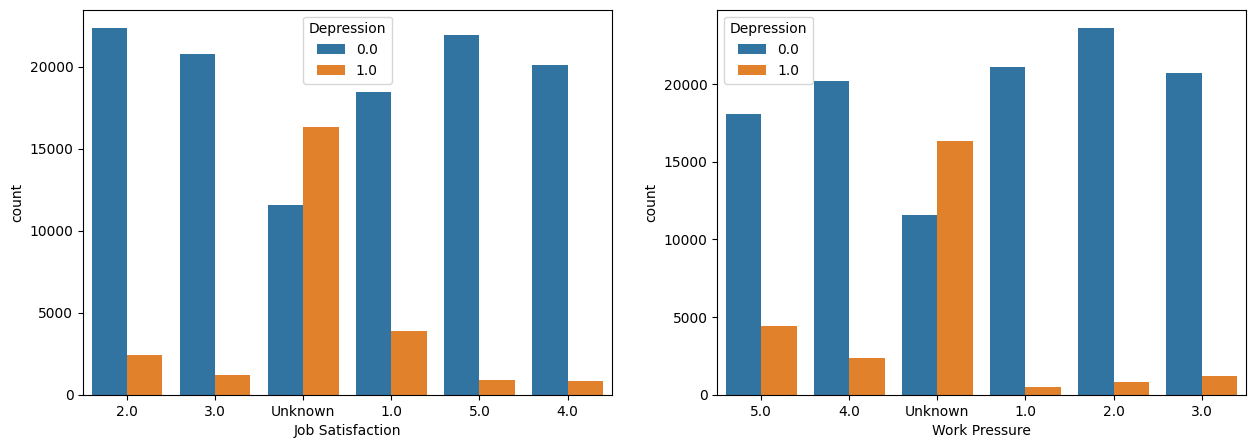

In [160]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(data,x="Job Satisfaction",hue="Depression",ax=axes[0])
sns.countplot(data,x="Work Pressure",hue="Depression",ax=axes[1])

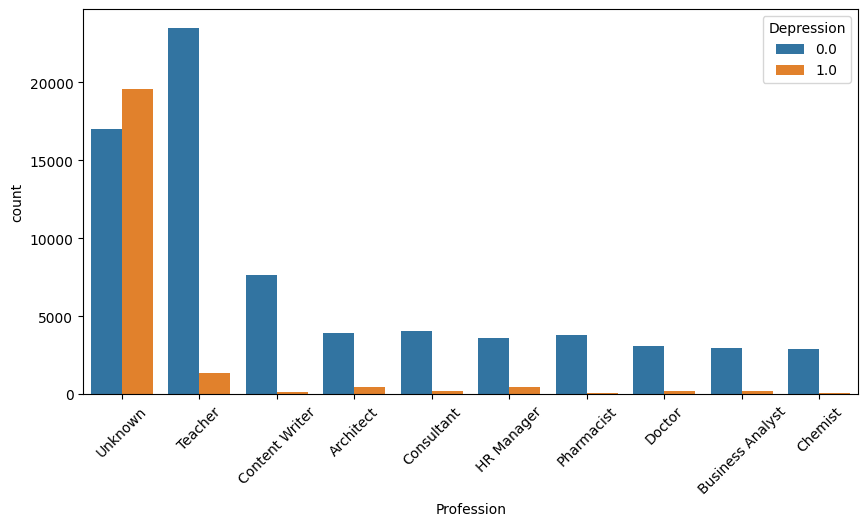

In [161]:
fig, axs = plt.subplots(ncols=1, nrows=1,figsize=(10,5))
sns.countplot(data,x="Profession",hue="Depression",order=data["Profession"].value_counts().iloc[:10].index,ax=axs)
axs.tick_params(axis='x', rotation=45)

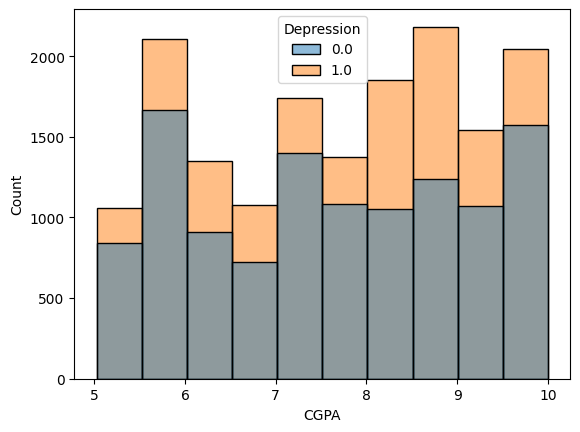

In [162]:
sns.histplot(data,x="CGPA",hue="Depression",bins=10)
data["CGPA"] = pd.cut(data["CGPA"],bins=10).astype('object')

In [163]:
data["CGPA"] = data["CGPA"].transform(lambda x: x.fillna("Unknown"))
data["Academic Pressure"] = data["Academic Pressure"].transform(lambda x: x.fillna("Unknown"))
data["Study Satisfaction"] = data["Study Satisfaction"].transform(lambda x: x.fillna("Unknown"))

<Axes: xlabel='Study Satisfaction', ylabel='count'>

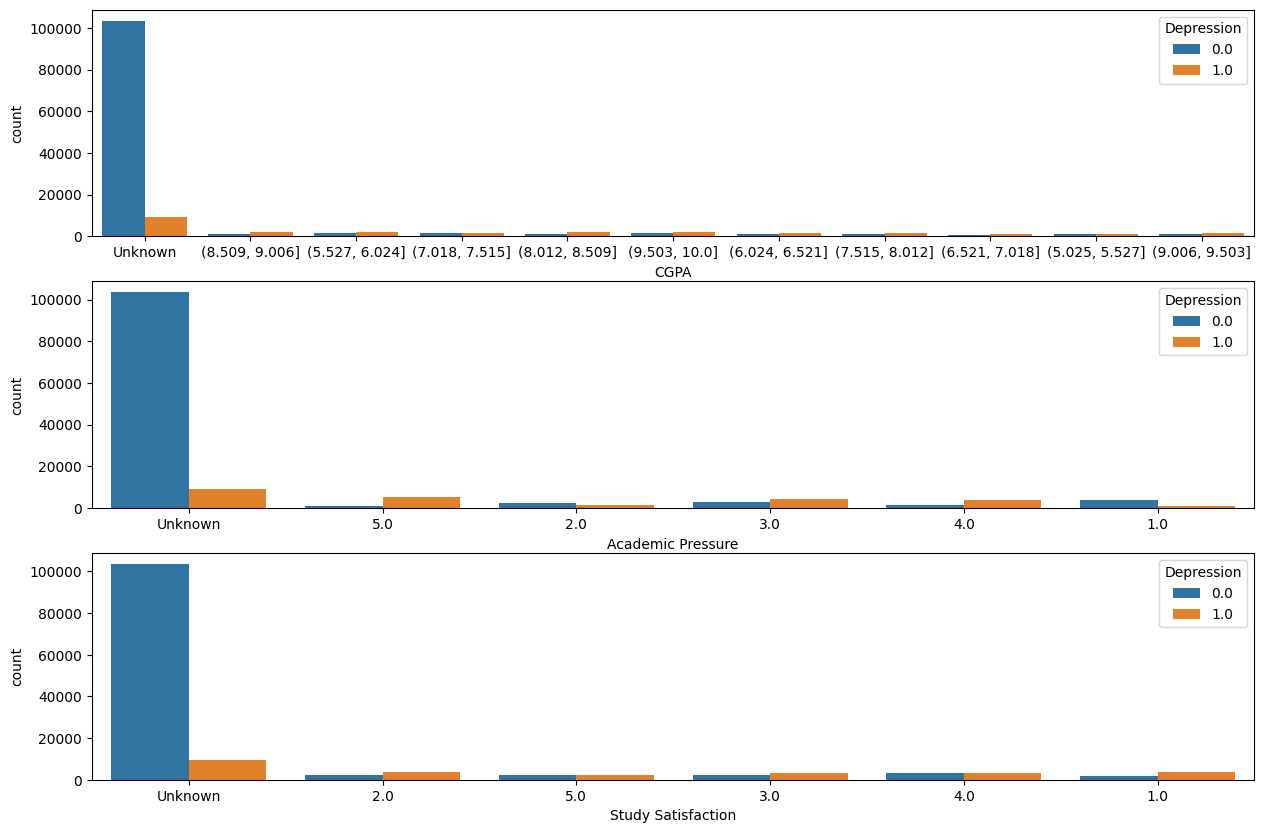

In [167]:
fig, axs = plt.subplots(ncols=1, nrows=3,figsize=(15,10))
sns.countplot(data,x="CGPA",hue="Depression",ax=axs[0])
sns.countplot(data,x="Academic Pressure",hue="Depression",ax=axs[1])
sns.countplot(data,x="Study Satisfaction",hue="Depression",ax=axs[2])

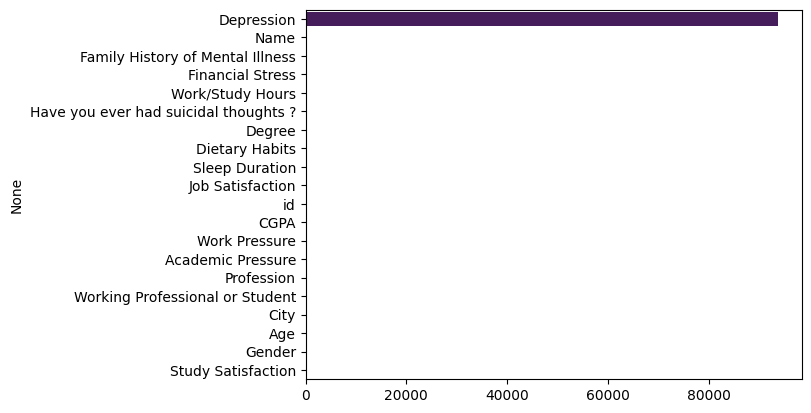

In [168]:
show_missing_values(data)